In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.abspath("."), '../src'))
import pyvista as pv
import numpy as np
pv.set_jupyter_backend("static")

In [2]:
from SimpleFVM import *
mesh_filename: str = "../example/mesh.cgns"
mesh = MyMesh()
mesh.readCGNS(mesh_filename, 0, 2)
mesh.mesh

ERROR:root:Input port 0 of algorithm vtkAppendFilter (000002290498E310) has 0 connections but is not optional.


UnstructuredGrid (0x22916c0e7a0)
  N Cells:    133
  N Points:   153
  X Bounds:   -1.400e-02, 1.600e-02
  Y Bounds:   -1.400e-02, 1.000e-02
  Z Bounds:   0.000e+00, 0.000e+00
  N Arrays:   5

{(35, 28): 0.1, (34, 35): 0.1, (33, 34): 0.1, (32, 33): 0.1, (31, 32): 0.1, (30, 31): 0.1, (29, 30): 0.1, (21, 29): 0.1}


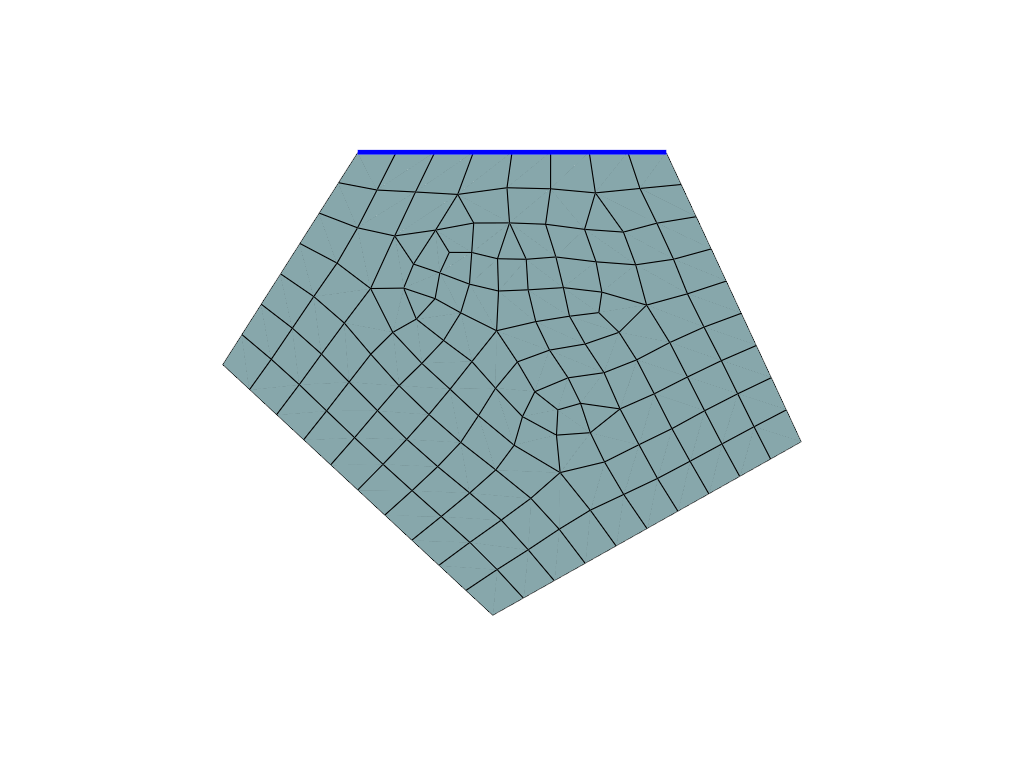

In [3]:
def isNeumannBoundary(x1, y1, x2, y2):
    if y1 > 0.99e-2 and y2 > 0.99e-2:
        return True
    else:
        return False
    pass

def neumannBoundaryValue(x1, y1, x2, y2):
    return 0.1
    pass

mesh.setNeumannBoundary(isNeumannBoundary, neumannBoundaryValue)
print(mesh.neumann_boundary_dict)
markNeumannBoundary(mesh)

In [4]:
solver: Solver = Solver()
solver.combineMesh(mesh)
solver.setAlpha(0.0001)
solver.setMaxIteration(100)
solver.setDt(1e-2)

In [5]:
solver.solve("../example/neumann_demo")

100%|██████████| 100/100 [00:06<00:00, 15.33it/s]


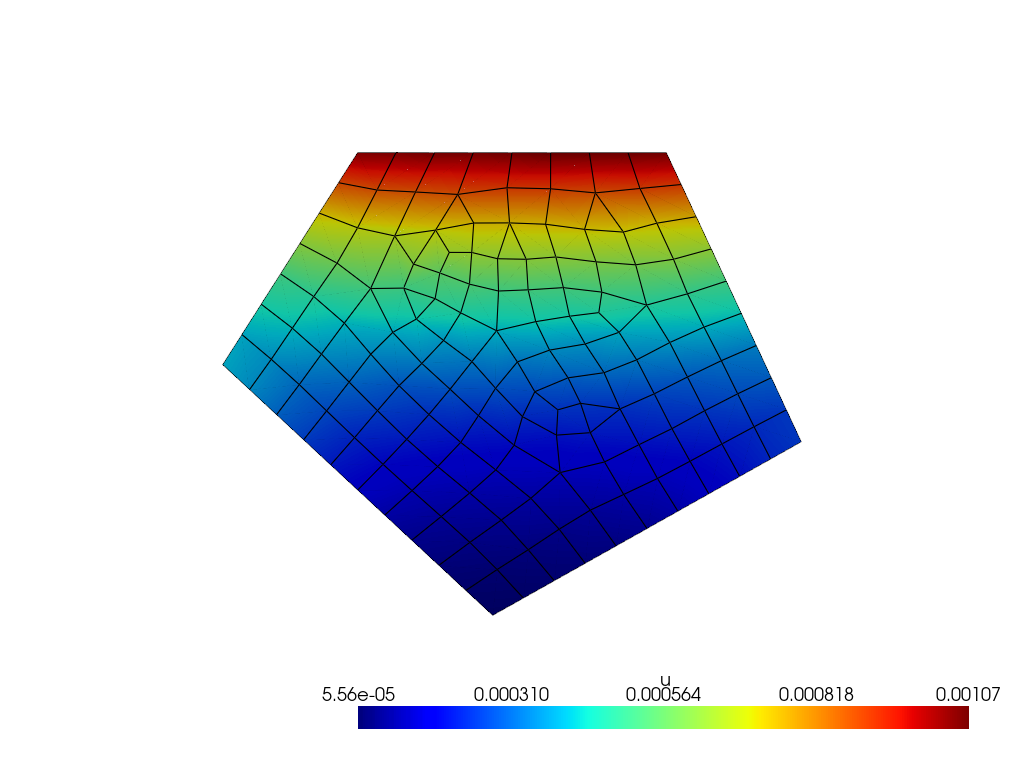

In [6]:
plotCurrentStateOnPoints(solver)